In [2]:
#로지스틱 회귀(if 0.5이상이면 합격, 미만이면 불합격)
import pandas as pd # 데이터 분석을 위한 리이브러리
import matplotlib.pyplot as plt #시그모이드 함수 시각화 목적 라이브러리

dataset=pd.read_csv('data/LogisticRegressionData.csv')
# dataset
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
# X.shape,y.shape

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
# X_train.shape

from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(X_train,y_train)

# logistic.predict([[4.4]]) #4.5시간 공부부터 합격

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [3]:
#몇 시간부터 합격권에 해당하는지 구하기
import numpy as np
for hour in np.arange(4.0,5.0,0.1):
    pred=logistic.predict([[hour]])
    print(f'{hour:.1f}:{pred[0]}')

4.0:0
4.1:0
4.2:0
4.3:0
4.4:0
4.5:1
4.6:1
4.7:1
4.8:1
4.9:1


In [4]:
#데이터를 가져와 예측하기
df=pd.read_csv('data/로지스틱회귀.csv')

X=df[['hour']].values
X.shape
y_pred=logistic.predict(X)
y_pred #홍길/강감/이순/성춘향 의 합격예측을 확인(1=합,0=불합)

KeyError: "None of [Index(['hour'], dtype='object')] are in the [columns]"

In [ ]:
# pass 열제목을 '합격여부로 변경
df['pass']=y_pred
df['합격여부']=df['pass'].apply(lambda x:'합격' if x==1 else '불합격') #lambda는 합격 경우를 먼저, 나머지 경우를 불합격 식으로 입력함
df
logistic.score(X_train,y_train)

0.875

In [ ]:
import numpy as np
x_range=np.arange(0,10.1,0.1)
x_range

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [ ]:
#y=mx +b
y=logistic.coef_ * x_range+logistic.intercept_
#p=1/(1+e^-y)
p=1/(1+np.exp(-y)) #2의 -y승
p.shape #2차항변 1행 101열
y_range=p.reshape(p.shape[1]) #y_range는 p의 101열을 가지고 와서 101행으로 만듦(p는 배열이므로 p.shape로 만들어서 reshape함)
y_range.shape

(101,)

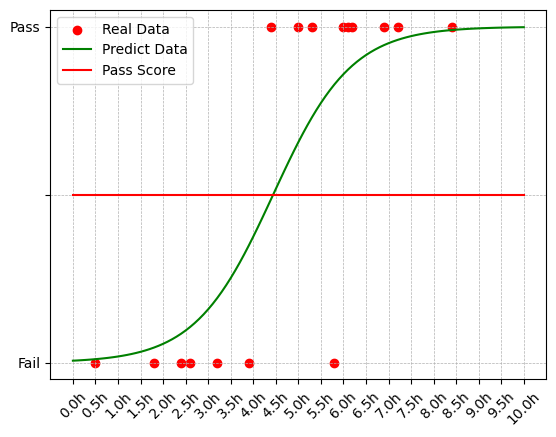

In [ ]:
# 로지스틱 회귀 함수를 시각화하기(train 함수로)
plt.Figure(figsize=(5,10))
plt.scatter(X_train,y_train,label='Real Data',color='r') #실제데이터 기반
plt.plot(x_range,y_range,color='green',label='Predict Data') #예측 데이터 기반
plt.plot(x_range, np.full(len(x_range),0.5),color='red',label='Pass Score') #합격 커트라인점수
xticks=[x for x in np.arange(0,10.5,0.5)]
plt.xticks(xticks,[f'{x:.1f}h' for x in xticks], rotation=45)
plt.yticks([0,0.5,1],['Fail','','Pass'])
plt.grid(True,ls='--',lw=0.5)
plt.legend()
plt.show()

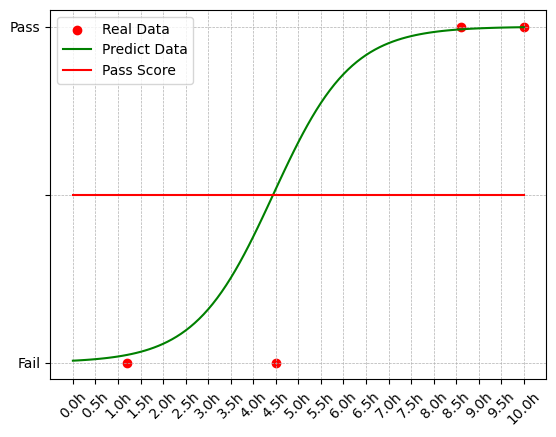

In [ ]:
# 로지스틱 회귀 함수를 시각화하기(test 데이터 활용)
plt.Figure(figsize=(5,10))
plt.scatter(X_test,y_test,label='Real Data',color='r') #실제데이터 기반
plt.plot(x_range,y_range,color='green',label='Predict Data') #예측 데이터 기반
plt.plot(x_range, np.full(len(x_range),0.5),color='red',label='Pass Score') #합격 커트라인점수
xticks=[x for x in np.arange(0,10.5,0.5)]
plt.xticks(xticks,[f'{x:.1f}h' for x in xticks], rotation=45)
plt.yticks([0,0.5,1],['Fail','','Pass'])
plt.grid(True,ls='--',lw=0.5)
plt.legend()
plt.show()

In [ ]:
y_pred=logistic.predict(X_test)
y_pred,y_test

(array([1, 0, 1, 1]), array([1, 0, 1, 0]))

In [ ]:
y_pred=logistic.predict(X_train)
y_pred,y_train

(array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1]),
 array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1]))

In [ ]:
#몇 개 맞췄는지, 틀렸는지를 출력해주는 함수(혼동함수)
y_pred=logistic.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
true=cm[0,0]+cm[1,1]
f'정답 수:{true}개'

'정답 수:3개'

In [ ]:
#몇 개 맞췄는지, 틀렸는지를 출력해주는 함수(혼동함수)
y_pred=logistic.predict(X_train)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,y_pred)
cm #train에 대해 6개가 올바르게 0 예측, 1을 잘못해서 1예측  // 1개를 잘못하여 0 예측, 8개를 올바르게 1로 예측
true=cm[0,0]+cm[1,1] # 00(올바르게 0예측) ,11(올바르게 1예측)
f'정답 수:{true}개'


'정답 수:14개'

In [ ]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
y_pred=logistic.predict(X)
cm=confusion_matrix(y,y_pred)
cm
true=cm[0,0]+cm[1,1]
f'정답 수는 {true}개 입니다.'

'정답 수는 17개 입니다.'

In [ ]:
df2=dataset.copy()
df2['predict']=y_pred
filt=df2['pass']!=df2['predict'] #틀린 것 구하기
df2[filt]

,hour,pass,predict
7,4.4,1,0
8,4.5,0,1
11,5.8,0,1


In [5]:
import pandas as pd
df=pd.read_csv('data/로지스틱회귀.csv')
df
X=df.loc[:,'공부시간'].values
X2=X.reshape(len(X),1)
y_pred=logistic.predict(X2)
y_pred_proba=logistic.predict_proba(X2)
y_pred_pass=[f'{y[1]*100:.2f}%' for y in y_pred_proba]
df['pass']=y_pred
df['합격예상']=df['pass'].apply(lambda x:'합격' if x==1 else '불합격')
df['예상합격률']=y_pred_pass
df.drop(columns='pass',inplace=True)
df

,이름,공부시간,합격예상,예상합격률
0,홍길동,4.2,불합격,43.06%
1,강감찬,5.1,합격,68.18%
2,이순신,4.4,불합격,48.80%
3,성춘향,7.2,합격,96.05%
